# Import Libraries and Data

Followed exact methodology set out in exercise 6.3 because my dataset is all for New York City so the Choropleth map would not be very beneficial for my actual project directive and deliverables (and I wanted to get the most out of this task that I could)! :)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Import ".json" file for the U.S. 

country_geo = r'C:/Users/drich/Desktop/Citi Bike/02 Data/Prepared Data/us-states.json'

In [5]:
country_geo

'C:/Users/drich/Desktop/Citi Bike/02 Data/Prepared Data/us-states.json'

In [43]:
#folder shortcut
path = r'/Users/drich/Desktop/Citi Bike'

In [44]:
# Import the recipes data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'recipes.csv'), index_col = False)

In [45]:
df

title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1      Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                    Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                        Spinach Noodle Casserole    3.125     547.0     20.0   
...                                            ...     ...       ...      ...   
20047                              Parmesan Puffs    3.125      28.0      2.0   
20048              Artichoke and Parmesan Risotto    4.375     671.0     22.0   
20049                       Turkey Cream Puff Pie    4.375     563.0     31.0   
20050     Snapper on Angel Hair with Citrus Cream    4.375     631.0     45.0   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0     73.0   

        fat  sodium  #cakeweek  #wasteless  22-minute meals  \
0       7.0   559.0        0.0         0.0              0.0   
1      23.0  1439.0        0.0         0.0              0.0   
2       7.0   165.0        0.0         0.0              0.0   
3       NaN     NaN        0.0         0.0              0.0   
4      32.0   452.0        0.0         0.0              0.0   
...     ...     ...        ...         ...              ...   
20047   2.0    64.0        0.0         0.0              0.0   
20048  28.0   583.0        0.0         0.0              0.0   
20049  38.0   652.0        0.0         0.0              0.0   
20050  24.0   517.0        0.0         0.0              0.0   
20051  10.0  3698.0        0.0         0.0              0.0   

       3-ingredient recipes  ...  yellow squash  yogurt  yonkers  yuca  \
0                       0.0  ...            0.0     0.0      0.0   0.0   
1                       0.0  ...            0.0     0.0      0.0   0.0   
2                       0.0  ...            0.0     0.0      0.0   0.0   
3                       0.0  ...            0.0     0.0      0.0   0.0   
4                       0.0  ...            0.0     0.0      0.0   0.0   
...                     ...  ...            ...     ...      ...   ...   
20047                   0.0  ...            0.0     0.0      0.0   0.0   
20048                   0.0  ...            0.0     0.0      0.0   0.0   
20049                   0.0  ...            0.0     0.0      0.0   0.0   
20050                   0.0  ...            0.0     0.0      0.0   0.0   
20051                   0.0  ...            0.0     0.0      0.0   0.0   

       zucchini  cookbooks  leftovers  snack  snack week  turkey  
0           0.0        0.0        0.0    0.0         0.0     1.0  
1           0.0        0.0        0.0    0.0         0.0     0.0  
2           0.0        0.0        0.0    0.0         0.0     0.0  
3           0.0        0.0        0.0    0.0         0.0     0.0  
4           0.0        0.0        0.0    0.0         0.0     0.0  
...         ...        ...        ...    ...         ...     ...  
20047       0.0        0.0        0.0    0.0         0.0     0.0  
20048       0.0        0.0        0.0    0.0         0.0     0.0  
20049       0.0        0.0        0.0    0.0         0.0     1.0  
20050       0.0        0.0        0.0    0.0         0.0     0.0  
20051       0.0        0.0        0.0    0.0         0.0     0.0  

[20052 rows x 680 columns]

In [46]:
df.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  \
0  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
1  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
2  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
3  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
4  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   

   snack  snack week  turkey  
0    0.0         0.0     1.0  
1    0.0         0.0     0.0  
2    0.0         0.0     0.0  
3    0.0         0.0     0.0  
4    0.0         0.0     0.0  

[5 rows x 680 columns]

In [47]:
df.shape

(20052, 680)

# Data Wrangling

In [48]:
# Select only the necessary columns and put them in a list called columns

columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin",
"title",
"rating",
"calories",
"protein",
"fat",
"sodium"
]

In [49]:
# Create a subset

state_rec = df[columns]

In [50]:
state_rec.head()

alabama  alaska  arizona  california  colorado  connecticut  florida  \
0      0.0     0.0      0.0         0.0       0.0          0.0      0.0   
1      0.0     0.0      0.0         0.0       0.0          0.0      0.0   
2      0.0     0.0      0.0         0.0       0.0          0.0      0.0   
3      0.0     0.0      0.0         0.0       0.0          0.0      0.0   
4      0.0     0.0      0.0         1.0       0.0          0.0      0.0   

   georgia  hawaii  idaho  ...  virginia  washington  west virginia  \
0      0.0     0.0    0.0  ...       0.0         0.0            0.0   
1      0.0     0.0    0.0  ...       0.0         0.0            0.0   
2      0.0     0.0    0.0  ...       0.0         0.0            0.0   
3      0.0     0.0    0.0  ...       0.0         0.0            0.0   
4      0.0     0.0    0.0  ...       0.0         0.0            0.0   

   wisconsin                                        title  rating  calories  \
0        0.0              Lentil, Apple, and Turkey Wrap    2.500     426.0   
1        0.0  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0   
2        0.0                Potato and Fennel Soup Hodge    3.750     165.0   
3        0.0             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN   
4        0.0                    Spinach Noodle Casserole    3.125     547.0   

   protein   fat  sodium  
0     30.0   7.0   559.0  
1     18.0  23.0  1439.0  
2      6.0   7.0   165.0  
3      NaN   NaN     NaN  
4     20.0  32.0   452.0  

[5 rows x 49 columns]

In [51]:
# Select only the states from state_rec in a new subset

states_num = state_rec[["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]]

In [52]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas Series data structure

s2 = states_num.idxmax(axis=1)

Note: # You have not encountered Series yet, but it is another pandas data structure. It is similar to a dataframe, but it is 
 one-dimensional - this means it can only have one column, whereas a dataframe is two dimensional. You can turn any dataframe
#column into series and you can add series to a dataframe as a column!

In [53]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [54]:
type(s2)

pandas.core.series.Series

In [55]:
# Create new column 'state' in the state_rec dataframe

state_rec['STATE_NAME'] = s2

/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_7035/2289483485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = s2


In [56]:
state_rec.columns

Index(['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'nebraska',
       'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [57]:
# Drop the dummy columns from the dataframe

state_rec.drop(columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"], inplace = True)

/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_7035/3895877212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec.drop(columns = ["alabama",


In [58]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [59]:
state_rec.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  STATE_NAME  
0   7.0   559.0     alabama  
1  23.0  1439.0     alabama  
2   7.0   165.0    new york  
3   NaN     NaN     alabama  
4  32.0   452.0  california

In [60]:
type(state_rec)

pandas.core.frame.DataFrame

In [61]:
state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()

/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_7035/476765381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()


In [62]:
state_rec.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  STATE_NAME  
0   7.0   559.0     Alabama  
1  23.0  1439.0     Alabama  
2   7.0   165.0    New York  
3   NaN     NaN     Alabama  
4  32.0   452.0  California

# Consistency Checks

In [63]:
# Check for missing values

state_rec.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

In [64]:
# Impute missing values with median

state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
state_rec['fat'].fillna(state_rec['fat'].median(), inplace=True)
state_rec['sodium'].fillna(state_rec['sodium'].median(), inplace=True)

/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_7035/2577725988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_7035/2577725988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
/var/folders/jg/l6fh0x4d1wd8whn_k695bf0w0000gn/T/ipykernel_7035/2577725988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [65]:
# Last check for NaN

state_rec.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
STATE_NAME    0
dtype: int64

# Check Duplicates

In [66]:
dups = state_rec.duplicated()

In [67]:
dups.shape #none

(20052,)

# Check Extreme Values

<Axes: xlabel='fat', ylabel='Count'>

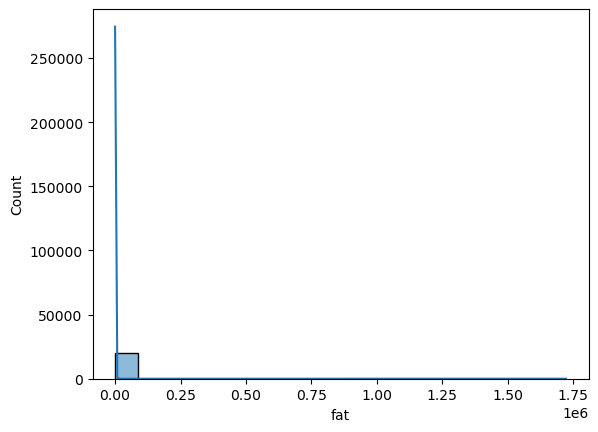

In [68]:
sns.histplot(state_rec['fat'], bins=20, kde = True) # shows extreme values for 'fat'

In [69]:
#checking ex vals
state_rec[state_rec['fat'] >1000]

title  rating    calories  \
1304         Rice Pilaf with Lamb, Carrots, and Raisins    5.000   4157357.0   
1837   Bacon-Wrapped Trout Stuffed with Balsamic Onio...   4.375     12010.0   
2976                      Lamb Köfte with Tarator Sauce    5.000   4518216.0   
3280             Braised Short Ribs with Red Wine Gravy    3.750     19576.0   
5138                     Caramelized Apple and Pear Pie    3.125   3358029.0   
6368                       Deep-Dish Wild Blueberry Pie    4.375  29997918.0   
6645   Braised Orange-Ginger Short Ribs with Dried Ap...   4.375     16050.0   
6912                               Chocolate-Almond Pie    3.125   3358273.0   
8192            Grilled Lamb Chops with Porcini Mustard    5.000     24117.0   
8873   Grilled Cumin Chicken Breasts with Avocado Salsa    3.750     22312.0   
9731         Rice Pilaf with Lamb, Carrots, and Raisins    5.000   4157357.0   
10509      Braised Duck Legs with Shallots and Parsnips    4.375     16761.0   
11391              Pear-Cranberry Mincemeat Lattice Pie    4.375  30111218.0   
12123  Grilled Cumin Chicken Breasts with Avocado Salsa    3.750     22312.0   
14628  Lamb Chops Scottadito\r\n                With ...   0.000     11453.0   
16007  Grilled Cumin Chicken Breasts with Avocado Salsa    3.750     22312.0   
19194           Grilled Lamb Chops with Porcini Mustard    5.000     24117.0   
19672                 Apricot, Cranberry and Walnut Pie    4.375  13062948.0   

        protein        fat      sodium STATE_NAME  
1304   236489.0   221495.0   3134853.0    Alabama  
1837      403.0     1115.0     18212.0    Alabama  
2976   166471.0    44198.0   7540990.0    Alabama  
3280      723.0     1818.0      2950.0    Alabama  
5138    58324.0   186642.0   3449373.0    Alabama  
6368   200210.0  1716279.0  27570999.0    Alabama  
6645      592.0     1480.0      2629.0    Alabama  
6912    58334.0   186660.0   3449512.0    Alabama  
8192      940.0     2228.0      4382.0    Alabama  
8873      332.0     1007.0     13820.0    Alabama  
9731   236489.0   221495.0   3134853.0    Alabama  
10509     477.0     1610.0      3097.0    Alabama  
11391  200968.0  1722763.0  27675110.0    Alabama  
12123     332.0     1007.0     13820.0    Alabama  
14628     447.0     1054.0      1749.0    Alabama  
16007     332.0     1007.0     13820.0    Alabama  
19194     940.0     2228.0      4382.0    Alabama  
19672   87188.0   747374.0  12005810.0    Alabama

In [70]:
# Clean 
state_rec = state_rec[state_rec['fat'] < 500] 
# 500 was picked because it is beyond belief there could be a meal with over 500 gr of fat!

In [71]:
state_rec.shape

(20012, 7)

In [72]:
state_rec['cal_per_portion'] = state_rec['calories']*4
# make new col

<Axes: xlabel='cal_per_portion', ylabel='Count'>

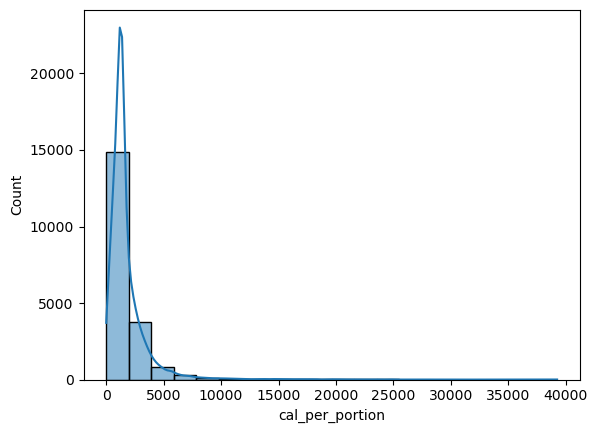

In [73]:
sns.histplot(state_rec['cal_per_portion'], bins=20, kde = True)  # shows extreme values for 'cal_per_portion'

In [74]:
# Clean ex vals
state_rec = state_rec[state_rec['cal_per_portion'] < 8000]

In [75]:
# Rating var check
sns.histplot(state_rec['rating'], bins=20, kde = True)

<Axes: xlabel='rating', ylabel='Count'>

In [76]:
# Select only non-zero rating entries
state_rec = state_rec[state_rec['rating'] >= 1]

In [77]:
state_rec.dtypes

title               object
rating             float64
calories           float64
protein            float64
fat                float64
sodium             float64
STATE_NAME          object
cal_per_portion    float64
dtype: object

# Plotting Choropleth

In [41]:
# Create data frame w just states and values for rating we want plotted
data_to_plot = state_rec[['STATE_NAME','rating']]
data_to_plot.head()

STATE_NAME  rating
0     Alabama   2.500
1     Alabama   4.375
2    New York   3.750
3     Alabama   5.000
4  California   3.125

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'rating'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

### Discuss the results and what they mean in a markdown section.

Does the analysis answer any of your existing research questions?

Does the analysis lead you to any new research questions?

    This analysis was extremely informative and taught me so much about the different amazing options that Jupyter has to offer in regards to disecting data and visualizations. My effort in this assingment was to make sure I am fully understanding of the way to handle data in this manner, and my project goals do not work for this assignment in the way i would want them to. That being said, I wanted to get the most out of this lesson in preparation for the Jop Prep Course because I really want to know what I am doing before applying to analytics jobs. So this does not answer my existing research questions, but i have been steadily working my project and I will list some research questions that would arise if this was my data set I was working for my project (I have attached a screenshot to the assignment turn-in box because I ran the formula correctly and my computer is having a data storage issue): 
    
    Are healthy foods more popular or junk foods?
    
    Are healhty foods more expensive or junk foods?
    
    Do different age groups have trends of food groups they prefer?
    
    -What about genders?
    
    What food groups make us the most money on an every dat basis?